# Mall Customer Segmentation using K-means Clustering




Customer segmentation is a vital strategy for businesses to understand their customer base and target marketing efforts effectively. K-means clustering is a popular unsupervised machine learning technique that groups customers into clusters based on their attributes, such as age, income, and spending score.

###Importing Libraries

Here, we import the necessary libraries. These include:

- **NumPy**: Used for numerical operations.
- **Matplotlib** and **Seaborn**: Libraries for creating visualizations.
- **Pandas**: For data manipulation and analysis.
- **Plotly Express**: To create interactive plots.
- **Warnings**: Filtered to avoid unnecessary warning messages during execution.

In [3]:
# K-Means Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

**Explanation:**
- **`pd.read_csv`**: Reads the dataset from a CSV file into a Pandas DataFrame.
- **`dataset.shape`**: Displays the number of rows and columns in the dataset.

In [4]:
# Importing the dataset
dataset = pd.read_csv('Mall_customers.csv')
dataset.shape

(200, 5)

## Dataset Summary and Missing Value Check

**Explanation:**
- **`describe()`**: Provides statistical summaries for numerical columns.
- **`isnull().sum()`**: Checks for missing values in each column and sums them.

In [ ]:
dataset.describe()
# check average values

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0



- **`isnull()`**: Checks for missing values in each column.
- **`sum()`**: Aggregates the number of missing values per column.
- Ensures data quality before proceeding to clustering.

## Gender Distribution

**Explanation:**
- **`value_counts()`**: Counts the occurrences of each gender.
- **`plot(kind='bar')`**: Visualizes the counts as a bar chart.
- Adds meaningful labels and a title to the chart.

<Axes: xlabel='Gender'>

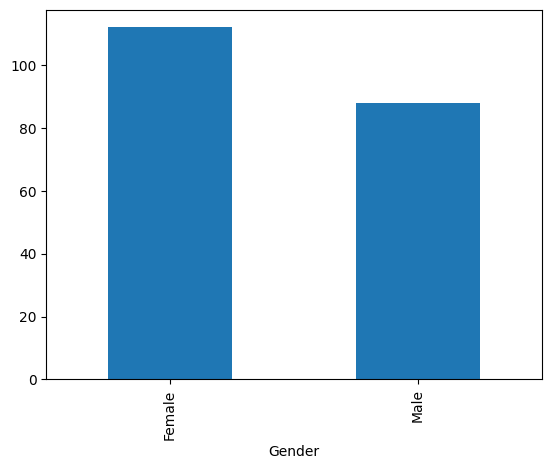

In [6]:
dataset['Gender'].value_counts().plot(kind = 'bar')
# Female customers are more compared to male customers.

## Age Distribution

**Explanation:**
- **`sns.histplot`**: Plots a histogram to display the age distribution.
- **`bins=10`**: Divides the age range into 10 intervals.
- **`kde=True`**: Adds a Kernel Density Estimate line to show the distribution.

<Axes: xlabel='Age', ylabel='Count'>

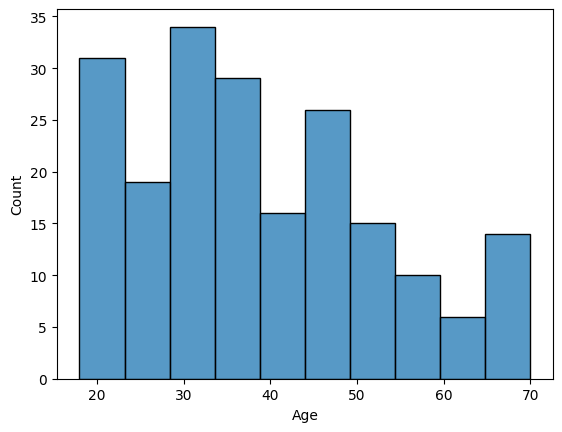

In [7]:
sns.histplot(dataset['Age'], bins =10)
# Most of the customers are in the 20-40 age group.

## Visualizing Spending Patterns

### Annual Income vs Spending Score

**Explanation:**
- **`plt.scatter`**: Creates a scatter plot to visualize the relationship between Annual Income and Spending Score.
- **`iloc[:, 3]` and `iloc[:, 4]`**: Extract columns for Annual Income and Spending Score, respectively.

Text(0, 0.5, 'Spending score')

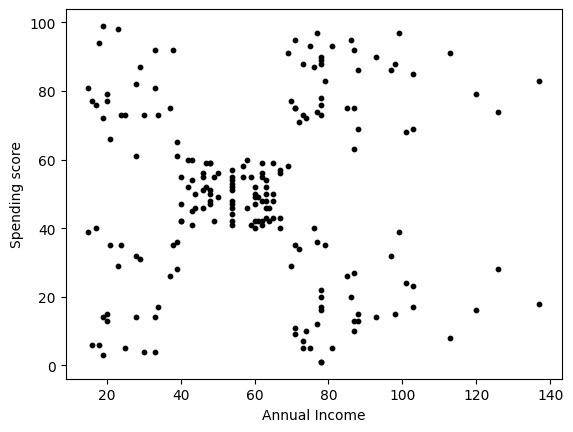

In [8]:
# visalizing the dataset
plt.scatter(dataset.iloc[:, 3], dataset.iloc[:, 4], s = 10, c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
# Spending score is high for customers with very low and very high income

### Age vs Spending Score

**Explanation:**
- Similar to the previous plot but visualizes the relationship between Age and Spending Score.

Text(0, 0.5, 'Spending score')

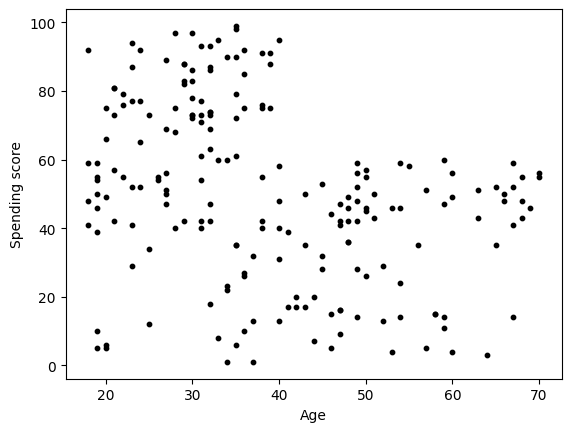

In [9]:
plt.scatter(dataset.iloc[:, 2], dataset.iloc[:, 4], s = 10, c = 'black')
plt.xlabel('Age')
plt.ylabel('Spending score')
# Spending score is high for the customers in the age group of 20-40

## Feature Selection

**Explanation:**
- **`select_dtypes(include=np.number)`**: Filters and selects only numerical columns.
- **`head()`**: Displays the first five rows of numerical features.


In [15]:
numerical_features = dataset.select_dtypes(include=np.number)

#This line selects only the columns in your DataFrame that have numerical data types (integers or floats), effectively excluding the 'Gender' column.

## Correlation Heatmap

**Explanation:**
- **`numerical_features.corr()`**: Computes the correlation matrix for numerical features.
- **`sns.heatmap`**: Creates a heatmap to visualize the correlation values.
- **`annot=True`**: Annotates the heatmap with correlation values.

<Axes: >

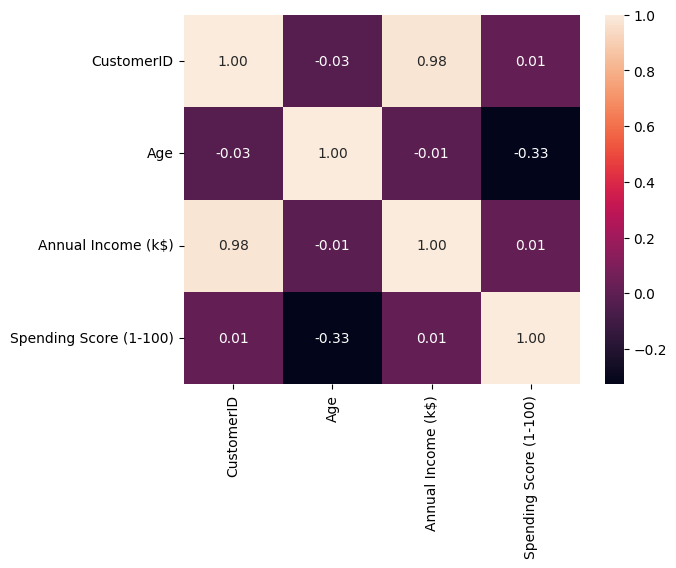

In [14]:
sns.heatmap(numerical_features.corr(), annot=True, fmt='0.2f')

## Applying K-Means Clustering based on annual income

Using the optimal number of clusters, we apply the K-Means algorithm to segment the customers. Each data point is assigned to the nearest cluster.

### Extract Relevant Columns

**Explanation:**
- **`iloc[:, [3, 4]]`**: Selects the columns for Annual Income and Spending Score.
- **`.values`**: Converts the selected columns to a NumPy array.

In [16]:
data = dataset.iloc[:, [3, 4]].values
# extracting annual income and average spending columns
data.shape

(200, 2)

KMeans method: sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

n_clusters: The number of clusters to form

init: {‘k-means++’, ‘random’}: ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence.

n_init: ‘auto’ or int: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia.

Output attributes are:
1. cluster_centers_ : Coordinates of cluster centers.

2. labels_ : Labels of each point

3. inertia_ : Sum of squared distances of samples to their closest cluster center

4. n_iter_ : Number of iterations run.

### Elbow Method

**Explanation:**
- **Elbow Method**: Determines the optimal number of clusters by plotting WCSS (Within-Cluster Sum of Squares).
- **`kmeans.inertia_`**: Provides the WCSS for the current number of clusters.
- **`range(1, 11)`**: Tests cluster counts from 1 to 10.

In [17]:
# Using the elbow method to find the optimal number of clusters
# k ranging from 1 to 11
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

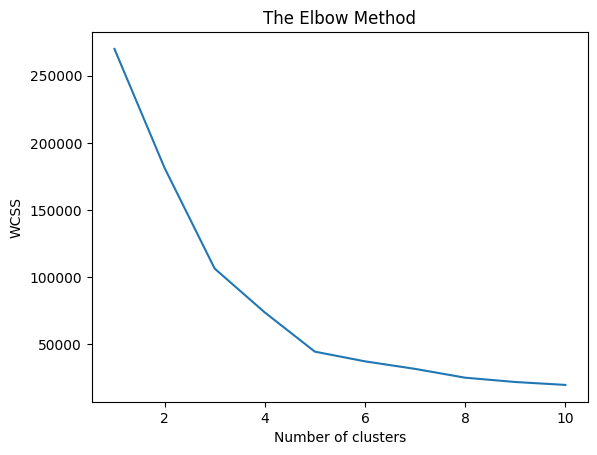

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# The plot shows having 5 clusters is optimal

### Apply K-Means Clustering

**Explanation:**
- **`n_clusters=5`**: Sets the number of clusters to 5 based on the Elbow Method.
- **`fit_predict`**: Fits the model and assigns each data point to a cluster.

In [19]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10)
labels = kmeans.fit(data)

In [20]:
# outputs Labels of each point
labels.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [21]:
labels.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

In [22]:
labels.n_iter_

6

In [23]:
test = [[50,80]]
labels.predict(test)
# outputs cluster index value

array([3], dtype=int32)

In [24]:
df = pd.DataFrame(data, columns = ['annual_income','average_spending'])
df['class_label'] = labels.labels_
df.head(3)

,annual_income,average_spending,class_label
0,15,39,0
1,15,81,3
2,16,6,0


In [25]:
df.class_label.value_counts()

,count
class_label,
4,81
1,39
2,35
0,23
3,22


Text(0, 0.5, 'average_spending')

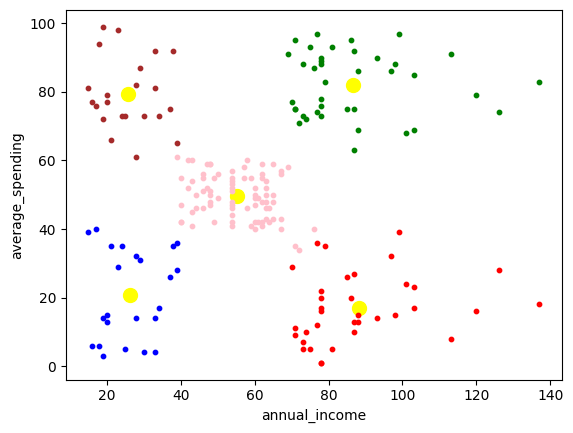

In [26]:
plt.scatter(labels.cluster_centers_[:, 0], labels.cluster_centers_[:, 1],
            s = 100, c = 'yellow')
k1 = df[df['class_label']== 0]
plt.scatter(k1['annual_income'], k1['average_spending'], s = 10, c = 'blue')
k2 = df[df['class_label']== 1]
plt.scatter(k2['annual_income'], k2['average_spending'], s = 10, c = 'green')
k3 = df[df['class_label']== 2]
plt.scatter(k3['annual_income'], k3['average_spending'], s = 10, c = 'red')
k4 = df[df['class_label']== 3]
plt.scatter(k4['annual_income'], k4['average_spending'], s = 10, c = 'brown')
k5 = df[df['class_label']== 4]
plt.scatter(k5['annual_income'], k5['average_spending'], s = 10, c = 'pink')
plt.xlabel('annual_income')
plt.ylabel('average_spending')

#### Next time when a customer comes, the mall can tailor the strategy to improve the business.

In [27]:
# Load the data from the CSV file
data = pd.read_csv('Mall_customers.csv')

In [28]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
# Select features
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [30]:
# Use LabelEncoder
X['Gender'] = X['Gender'].astype('category')
X['Gender'] = X['Gender'].cat.codes

In [31]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters you want
kmeans.fit(X)

KMeans(n_clusters=5)

In [32]:
# Get the cluster labels for each data point
labels = kmeans.labels_

In [33]:
# Add the cluster labels to the original data
data['Cluster'] = labels

### Visualizing Clusters

Visualizations help interpret the clustering results. We use scatter plots to show the distribution of customers across different clusters.

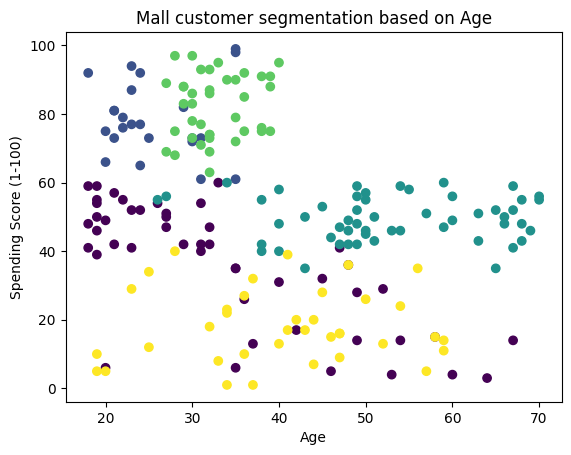

In [34]:
# Plot the clusters
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall customer segmentation based on Age')
plt.show()

### 3D Visualization

A 3D scatter plot is used to provide a more detailed view of the clustering results, especially when three features are involved.

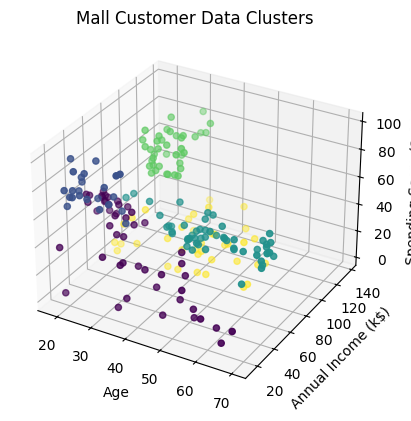

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Mall Customer Data Clusters')

plt.show()

In [36]:
# Create the scatter plot
sc_plot = px.scatter_3d(x = data['Age'], y = data['Annual Income (k$)'], z=data['Spending Score (1-100)'],
                        color = data['Cluster'])

# Display the plot
sc_plot.show()